# Network Charts

<font color = "MediumAquaMarine"><br>
Network Charts, Networkx kütüphanesinin bir görselleştirme aracıdır.
    <br>
<font color = "MediumAquaMarine"><br>
Network charts genellikle data'da feature'ler arasındaki correlation ile ilgilidir. Correlation denince akla gelen seaborn kütüphanesinden heatmap'tir. Heatmap, feature'ler arasındaki orantı hakkında bilgi veriyordu.
    <br>
<font color = "MediumAquaMarine"><br>
corr() metodu feature'ler arasındaki correlation'u verir.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Iris.csv")
data = data.drop(['Id'],axis=1)

In [3]:
corr = data.iloc[:,0:4].corr()
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


Çıktıyı inceleyelim. PetalLengthCm ve SepalLengthCm	feature'leri arasında 0.87 değerinde positive correlation vardır. Bunun anlamı, SepalLengthCm arttıkça 0.87 oranında PetalLengthCm artar.

PetalWidthCm ve SepalLengthCm feature'leri arasında 0.81 değerinde positive correlation vardır. Bunun anlamı, SepalLengthCm arttıkça 0.81 oranında PetalWidthCm	 artar.

PetalLengthCm ve SepalWidthCm -0.42 oranında ters orantılıdır.

<font color = "RosyBrown"><br>
Tüm bunları network analizi yaparak network chart ile görselleştirmek mümkündür. Network analizi yapan insanlar feature'lerin her birini "node" olarak isimlendirmişlerdir. 
<br>
<font color = "RosyBrown"><br>
2 tane feature birbirine yakın ise belli bir threshold değeri belirliyoruz ve bunları birbirine link ile bağlıyoruz. Mesela threshold değeri 0.9 olsun. İki tane feature yani node arasındaki correlation 0.9'un üzerinde ise bu ikisi birbirine bağlanır. Aralarındaki ilişkinin arandığı iki feature aynı ise aralarındaki orantı değeri 1 dir yani birbiri ile %100 doğru orantılıdır. 1 değerleri dışında 0.9'un üzerinde correlation oranına sahip olan PetalLengthCm ve PetalLengthCm node'leridir. Threshold değeri 0.9 ve network grafı çizdirmek isteseydik PetalLengthCm ve PetalLengthCm node'leri arasında bir bağlantı olucaktı ve diğer feature'ler arasında hiçbir bağlantı olmayacaktı. 
<br>
<font color = "RosyBrown"><br>
Network charts, heatmap yerine kullanılabilen bir alternatiftir. Ama genelde network charts, social network analizi yapılırken kullanılır. Social network, bir popülasyon incelemek demektir. Machine Learning kısmında heatmap kullanırız.

In [4]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [5]:
# import networkx library
import networkx as nx

# Transform it in a links data frame (3 columns only):
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']
links

,var1,var2,value
0,SepalLengthCm,SepalLengthCm,1.000000
1,SepalLengthCm,SepalWidthCm,-0.109369
2,SepalLengthCm,PetalLengthCm,0.871754
3,SepalLengthCm,PetalWidthCm,0.817954
4,SepalWidthCm,SepalLengthCm,-0.109369
5,SepalWidthCm,SepalWidthCm,1.000000
6,SepalWidthCm,PetalLengthCm,-0.420516
7,SepalWidthCm,PetalWidthCm,-0.356544
8,PetalLengthCm,SepalLengthCm,0.871754
9,PetalLengthCm,SepalWidthCm,-0.420516


Çıktıda gördüğünüz üzere, var1 sütununa bir feature, var2 sütununa bir feature verilmiştir ve bu iki feature arasındaki correlation değeri value sütununa yazdırılmıştır. 

<font color = "Sienna"><br>
Networkx kütüphanesini kullanabilmemiz için yukarıdaki kod bloğunu yazmamız gereklidir.

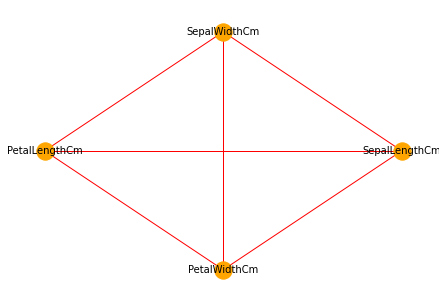

In [6]:
# correlation
threshold = -1

# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[ (links['value'] >= threshold ) & (links['var1'] != links['var2']) ]
 
# Build your graph
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 
# Plot the network
nx.draw_circular(G, with_labels=True, node_color='orange', node_size=300, edge_color='red', linewidths=1, font_size=10)

<font color="OliveDrab"><br>
threshold = -1

satırı ile threshold değerini -1 olarak belirledim. Çünkü her bir node arasında bağlantı görmek istiyoruz.
    
<font color="OliveDrab"><br>
links_filtered=links.loc[ (links['value'] >= threshold ) & (links['var1'] != links['var2']) ]
    
Aynı feature'ler arasındaki correlation değeri 1'dir. Bunu bildiğimiz için bu durumu görselleştirmenin anlamı yoktur. Dolayısıyla aynı feature'ler (mesela SepalLengthCm ve SepalLengthCm arasındaki correlation 1'dir) arasındaki linki çıkarmalıyız. Birde threshold değerinden büyük correlation değerine sahip feature'ler arasına link koymalıyız. Dolayısıyla bu satırda bir filtre uyguluyorum. Filtre ile value değerinin threshold değerinden büyük olması şartı ve var1 ile var2 sütunlarındaki değerlerin aynı feature olmaması şartı sağlanmıştır. Böylelikle iki farklı feature arasındaki correlation değerleri threshold değerine göre filtrelenmiştir.

<font color="OliveDrab"><br>    
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
    
Bu satır ile bir graph elde ediyorum.
    
<font color="OliveDrab"><br>
nx.draw_circular(G, with_labels=True, node_color='orange', node_size=300, edge_color='red', linewidths=1, font_size=10)
    
Bu satır ile grafı görselleştiriyorum.

Çıktıda gördüğünüz üzere, belirlediğim threshold değerine göre tüm feature'ler birbiri ile ilişki içerisindedir.